In [1]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.reference.plot_graph()
hdl.ppd.plot.savefig("quickstart_reference.svg")
hdl.ppd.plot.savefig("quickstart_reference.pdf")
#hdl.save_fig("results/quickstart_reference.svg")

Scheduled as dates
[ datetime.datetime(2018, 12, 24, 8, 18, 12, 455299),
  datetime.datetime(2018, 12, 24, 19, 19, 5, 240313),
  datetime.datetime(2018, 12, 25, 5, 47, 20, 53471),
  datetime.datetime(2018, 12, 25, 16, 52, 31, 263012),
  datetime.datetime(2018, 12, 26, 5, 27, 18, 539184),
  datetime.datetime(2018, 12, 26, 20, 43, 52, 368225),
  datetime.datetime(2018, 12, 27, 16, 57, 15, 749931),
  datetime.datetime(2018, 12, 28, 23, 33, 31, 472658),
  datetime.datetime(2018, 12, 31, 11, 9, 26, 146016),
  datetime.datetime(2019, 1, 9, 11, 15, 19, 726449)]


Scheduled as dates
[ datetime.datetime(2018, 12, 25, 3, 30, 12, 449011),
  datetime.datetime(2018, 12, 25, 14, 56, 20, 508757),
  datetime.datetime(2018, 12, 26, 3, 16, 41, 671475),
  datetime.datetime(2018, 12, 26, 17, 56, 21, 77619),
  datetime.datetime(2018, 12, 27, 13, 12, 38, 958121),
  datetime.datetime(2018, 12, 28, 18, 33, 6, 169381),
  datetime.datetime(2018, 12, 31, 5, 21, 21, 584205),
  datetime.datetime(2019, 1, 10, 1, 44, 53, 880810),
  datetime.datetime(2018, 12, 24, 15, 23, 51, 6385),
  datetime.datetime(2018, 12, 25, 2, 49, 59, 66131),
  datetime.datetime(2018, 12, 25, 15, 10, 20, 228849),
  datetime.datetime(2018, 12, 26, 5, 49, 59, 634993),
  datetime.datetime(2018, 12, 27, 1, 6, 17, 515495),
  datetime.datetime(2018, 12, 28, 6, 26, 44, 726755),
  datetime.datetime(2018, 12, 30, 17, 15, 0, 141579),
  datetime.datetime(2019, 1, 9, 13, 38, 32, 438184)]


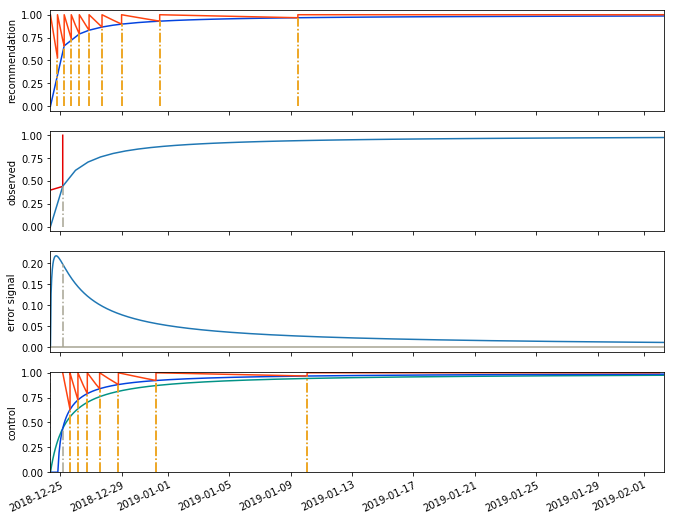

In [2]:
days_since_training_epoch = 0.0
lt.learned(result=0.40, when=days_since_training_epoch)
days_since_training_epoch = 0.8
lt.learned(result=0.44, when=days_since_training_epoch)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.plot_graphs()

lt.save_figure("quickstart_control_after_two_events.png")
lt.save_figure("quickstart_control_after_two_events.pdf")


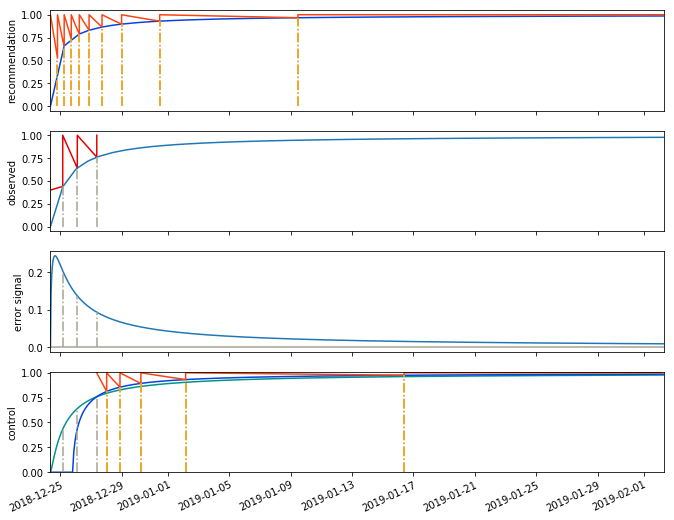

In [3]:
# students tests themselves 1.75 days after they start training
# they recall about 64 percent of the thing they are studying
days_since_training_epoch = 1.75
lt.learned(result=0.64, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection

# students tests themselves 3.02 days after they start training
# they recall about 76 percent of the thing they are studying
days_since_training_epoch = 3.02
lt.learned(result=0.76, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection
lt.plot_graphs()
lt.save_figure("quickstart_control_after_four_events.png")
lt.save_figure("quickstart_control_after_four_events.pdf")

[datetime.datetime(2019, 1, 22, 8, 18, 12, 449011), datetime.datetime(2019, 1, 20, 22, 9, 49, 504582)]


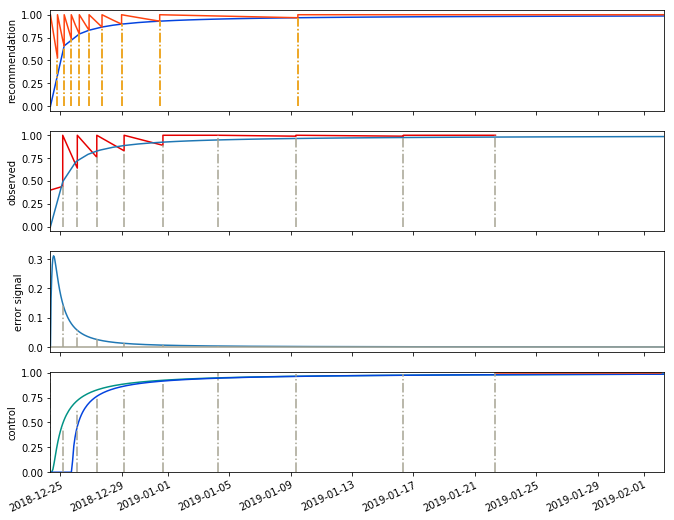

In [4]:
results = [ 
    [4.8,  7.33, 10.93, 16.00, 23.00, 29.00],
    [0.83, 0.89,  1.00,  0.99, 0.99,   1.00],
  ]

for dsi, r in zip(*results):
  days_since_training_epoch, result = dsi, r
  lt.learned(result=result, when=days_since_training_epoch)

print(lt.schedule())

# import pdb; pdb.set_trace()
hdl, _ = lt.plot_graphs()

lt.save_figure("./quickstart_control_after_ten_events.png")
lt.save_figure("./quickstart_control_after_ten_events.pdf")

In [5]:
for i, r in zip(*results):
    print(i)

4.8
7.33
10.93
16.0
23.0
29.0


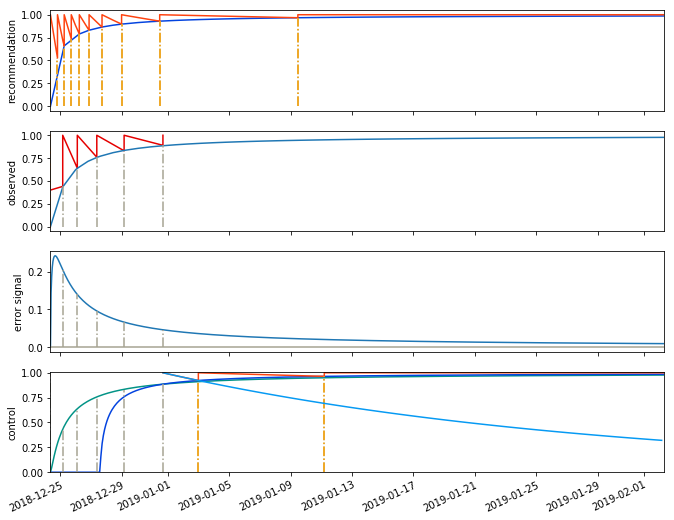

In [6]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)

days_and_results = [ 
    [0,    0.8,  1.75, 3.02, 4.8,  7.33],
    [0.40, 0.44, 0.64, 0.76, 0.83, 0.89],
]

for d, r in zip(*days_and_results):
  days_since_training_epoch, result = d, r
  lt.learned(result=result, when=days_since_training_epoch)

curve = 1
# get a set of datetimes
useful_range_of_datetimes = lt.range_for(curve=curve, range=10, day_step_size=0.5)
# make a results query using these datetime
results = [lt.recollect_scalar(moment, curve=curve) for moment in useful_range_of_datetimes]
hdl, data = lt.plot_graphs()
control_plot = hdl.axarr[-1]
#import pdb; pdb.set_trace()
control_plot.plot(useful_range_of_datetimes, results, color='xkcd:azure')


